In [5]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# assume the data points are drawn from a Gaussian distribution
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



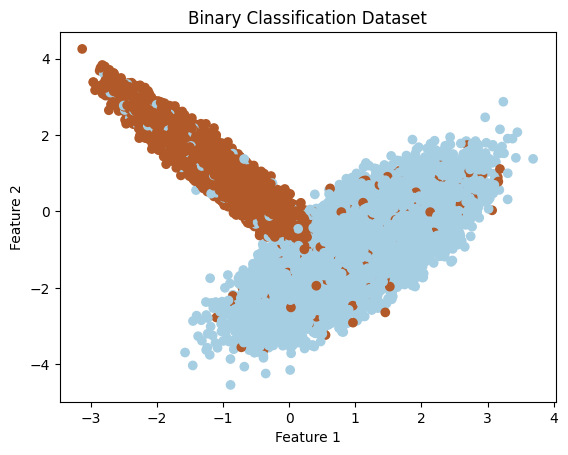

   Feature 1  Feature 2  Target
0  -2.003731   2.759892       1
1   1.805136  -0.311567       0
2   1.026414  -1.347605       0
3   1.165984  -0.813710       0
4  -0.929013   1.109383       1


In [11]:
### now lets construct a binary class dataset
# Import necessary libraries
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd

# Generate a binary classification dataset
X, y = make_classification(
    n_samples=100000,  # Total number of samples
    n_features=2,    # Number of features
    n_informative=2, # Number of informative features
    n_redundant=0,   # Number of redundant features
    n_clusters_per_class=1,  # Number of clusters per class
    flip_y=0.1,      # Probability of flipping the class label
    random_state=41   # Random seed for reproducibility
)

# Visualize the generated dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Dataset')
plt.show()

# Create a Pandas DataFrame for better visualization
df = pd.DataFrame({'Feature 1': X[:, 0], 'Feature 2': X[:, 1], 'Target': y})
print(df.head())


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)



0.9284

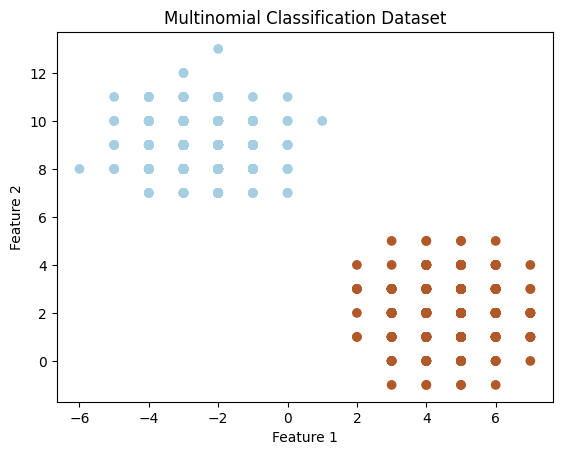

   Feature 1  Feature 2  Target
0         -2          8       0
1          6          1       1
2          4          1       1
3          5          1       1
4          4          5       1


In [13]:
# Import necessary libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

# Generate a binary classification dataset
X, y = make_blobs(
    n_samples=1000,
    centers=2,
    n_features=2,
    cluster_std=1.0,
    random_state=42
)

# Ensure non-negative integer values
X = X.round().astype(int)

# Visualize the generated dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Multinomial Classification Dataset')
plt.show()

# Create a Pandas DataFrame for better visualization
df = pd.DataFrame({'Feature 1': X[:, 0], 'Feature 2': X[:, 1], 'Target': y})
print(df.head())


In [18]:
# NOW LETS USE MULTINOMIAL CLASSIFIER for text data
# we can  can use the fetch_20newsgroups dataset from 
#scikit-learn. This dataset consists of approximately 
#20,000 newsgroup documents spanning 20 different newsgroups.
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
print(newsgroups.target_names)
print(newsgroups.data[0])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB(alpha=0.1)

# Train the classifier on the vectorized training data
model.fit(X_train_vectorized, y_train)

# Make predictions on the vectorized test data
y_pred = model.predict(X_test_vectorized)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I 

In [19]:
# LETS TRY TO COMBINE MULTINOMIAL AND RANDOM FOREST to improve accuracy
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import 
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize the Multinomial Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vectorized, y_train)

# Create an ensemble of the models
ensemble_model = VotingClassifier(estimators=[('nb', nb_model), ('rf', rf_model)], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train_vectorized, y_train)

# Make predictions on the vectorized test data
y_pred = ensemble_model.predict(X_test_vectorized)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy:.2f}")

# Display classification report
print("Ensemble Classification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Ensemble Accuracy: 0.66
Ensemble Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.49      0.57      0.53       151
           comp.graphics       0.43      0.82      0.57       202
 comp.os.ms-windows.misc       0.59      0.47      0.52       195
comp.sys.ibm.pc.hardware       0.49      0.66      0.56       183
   comp.sys.mac.hardware       0.79      0.61      0.69       205
          comp.windows.x       0.82      0.73      0.77       215
            misc.forsale       0.73      0.69      0.71       193
               rec.autos       0.45      0.80      0.58       196
         rec.motorcycles       0.67      0.64      0.66       168
      rec.sport.baseball       0.80      0.82      0.81       211
        rec.sport.hockey       0.85      0.84      0.85       198
               sci.crypt       0.74      0.78      0.76       201
         sci.electronics       0.70      0.45      0.55       202
                 sc

In [22]:
#pip install xgboost
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.datasets import fetch_20newsgroups

# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize the Multinomial Naive Bayes classifier
nb_model = MultinomialNB(0.1)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier()

# Create an ensemble of the models
ensemble_model = VotingClassifier(estimators=[('nb', nb_model), ('xgb', xgb_model)], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train_vectorized, y_train)

# Make predictions on the vectorized test data
y_pred = ensemble_model.predict(X_test_vectorized)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy:.2f}")

# Display classification report
print("Ensemble Classification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Ensemble Accuracy: 0.68
Ensemble Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.47      0.60      0.52       151
           comp.graphics       0.45      0.79      0.57       202
 comp.os.ms-windows.misc       0.68      0.47      0.56       195
comp.sys.ibm.pc.hardware       0.53      0.73      0.61       183
   comp.sys.mac.hardware       0.79      0.61      0.69       205
          comp.windows.x       0.85      0.71      0.78       215
            misc.forsale       0.78      0.65      0.71       193
               rec.autos       0.72      0.73      0.72       196
         rec.motorcycles       0.41      0.73      0.53       168
      rec.sport.baseball       0.87      0.81      0.84       211
        rec.sport.hockey       0.90      0.82      0.85       198
               sci.crypt       0.77      0.79      0.78       201
         sci.electronics       0.67      0.51      0.58       202
                 sc